In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

In [28]:
data= pd.read_csv("dataset.csv")

In [3]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [4]:
data.shape

(45211, 11)

# data cleaning

### finding null values

In [5]:
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

### finding duplicates in data

In [6]:
data[data.duplicated()]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34,services,married,secondary,unknown,28,may,124,1,unknown,no
8138,29,admin.,single,secondary,unknown,2,jun,121,4,unknown,no
11630,39,blue-collar,married,primary,unknown,19,jun,112,4,unknown,no
13400,36,blue-collar,married,secondary,cellular,9,jul,183,1,unknown,no
19826,36,management,married,tertiary,cellular,8,aug,75,2,unknown,no
19854,32,technician,single,tertiary,cellular,8,aug,31,2,unknown,no


### removing duplicated rows

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(45205, 11)

### statistical description of data

In [9]:
data.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


## Exploratory Data Analysis

### Analyzing target variable

Text(0.5, 1.0, 'Target variable')

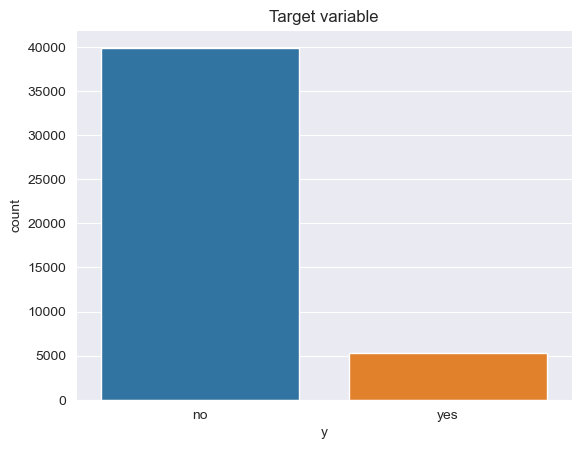

In [10]:
sns.set_style("darkgrid")
sns.countplot(data=data,x='y')
plt.title("Target variable")

By visualizing we can see target variable is imbalance

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45205 non-null  int64 
 1   job             45205 non-null  object
 2   marital         45205 non-null  object
 3   education_qual  45205 non-null  object
 4   call_type       45205 non-null  object
 5   day             45205 non-null  int64 
 6   mon             45205 non-null  object
 7   dur             45205 non-null  int64 
 8   num_calls       45205 non-null  int64 
 9   prev_outcome    45205 non-null  object
 10  y               45205 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.1+ MB


### univariate analysis of categorical column 

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome',
       'y'],
      dtype='object')


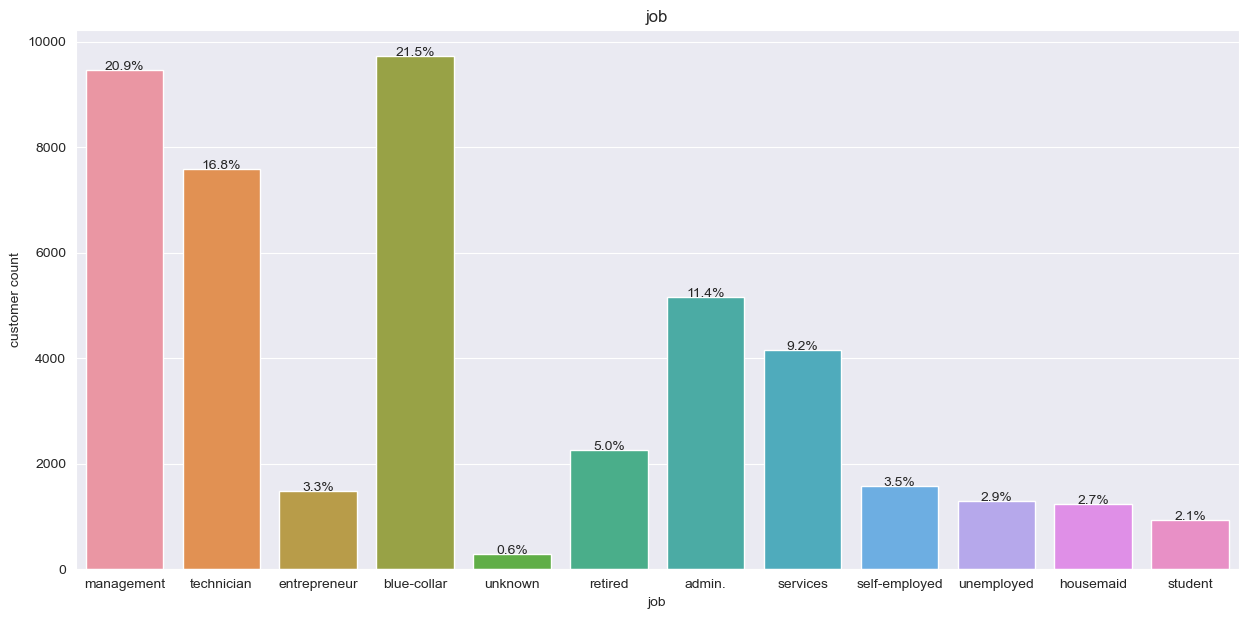

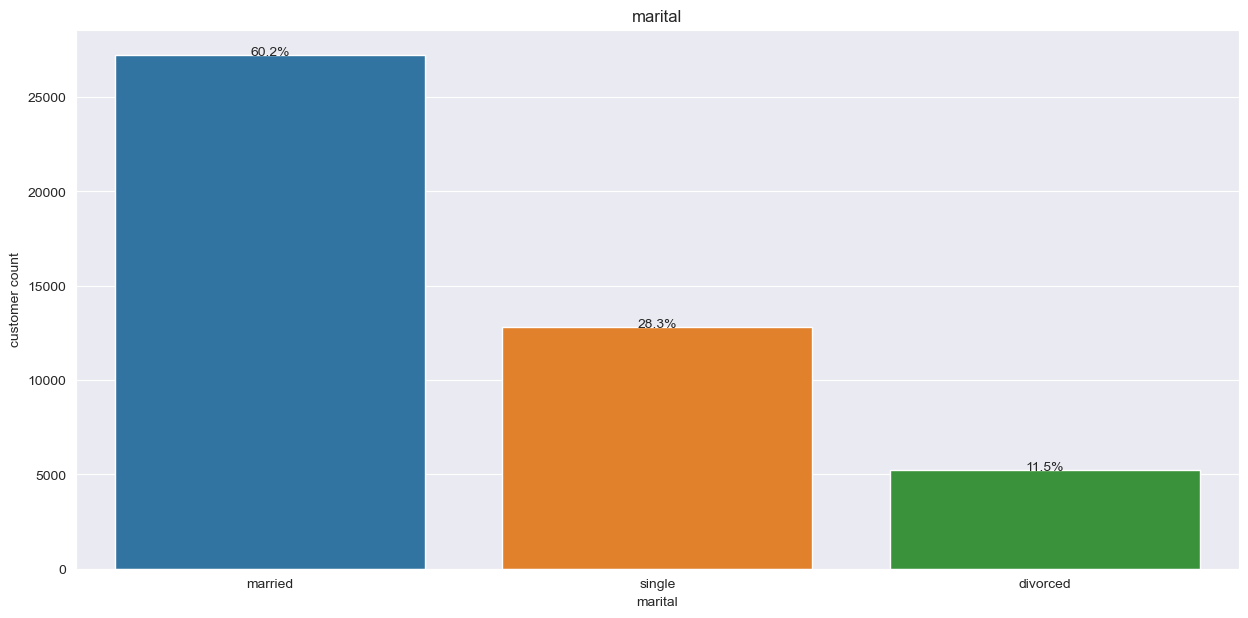

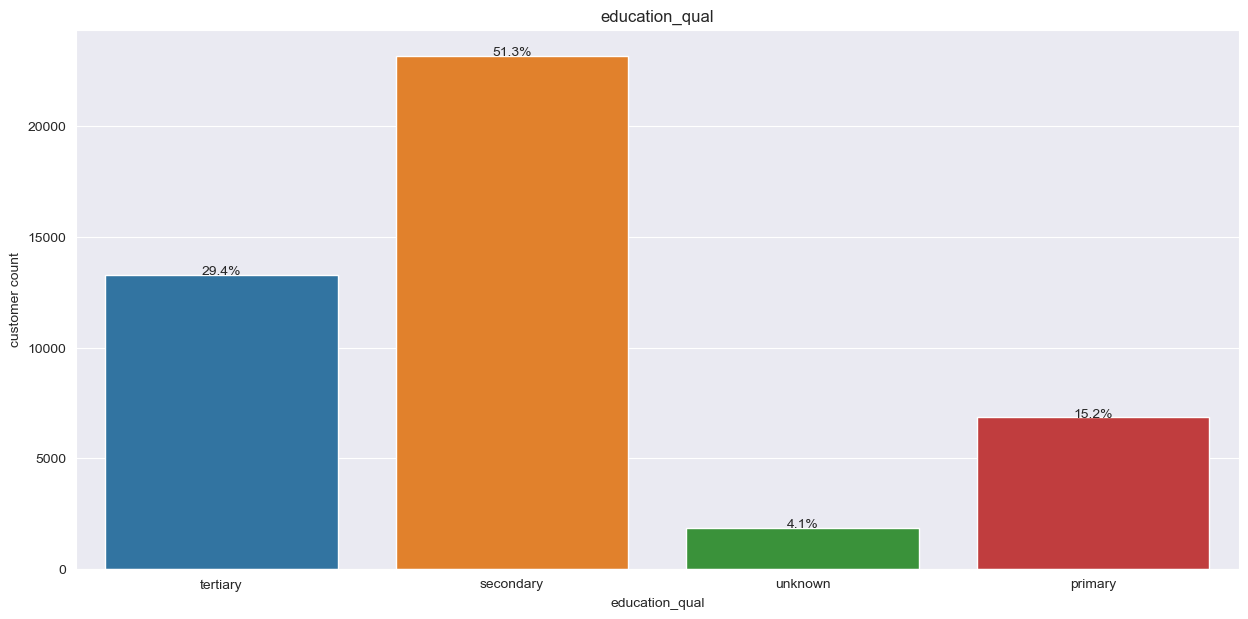

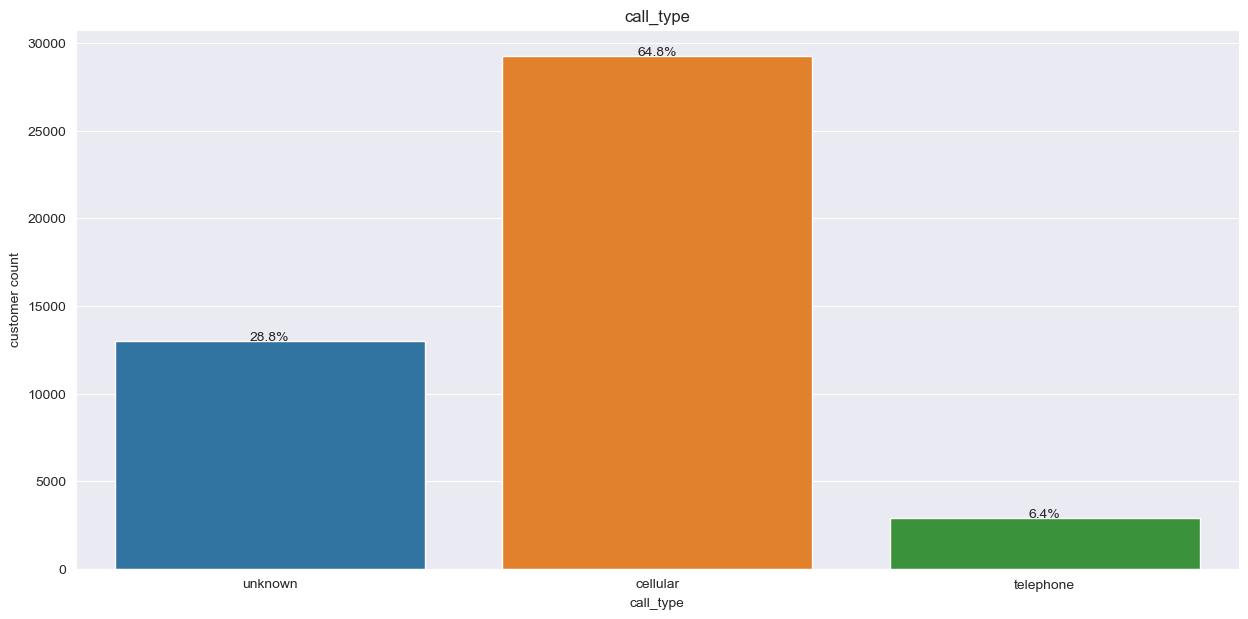

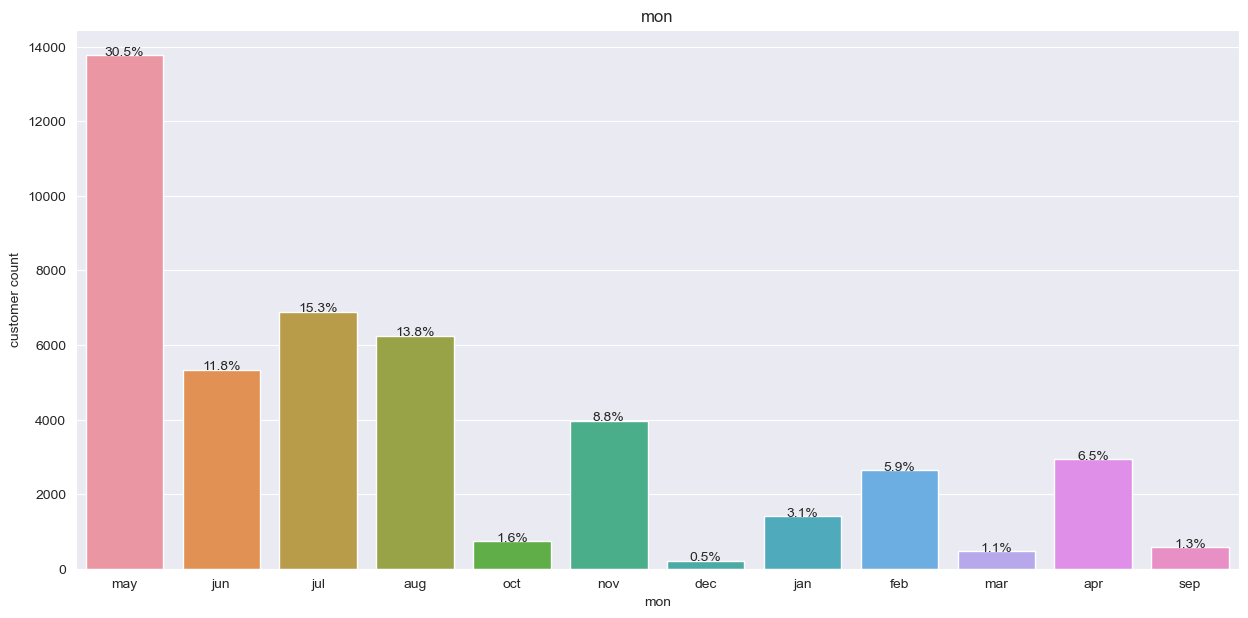

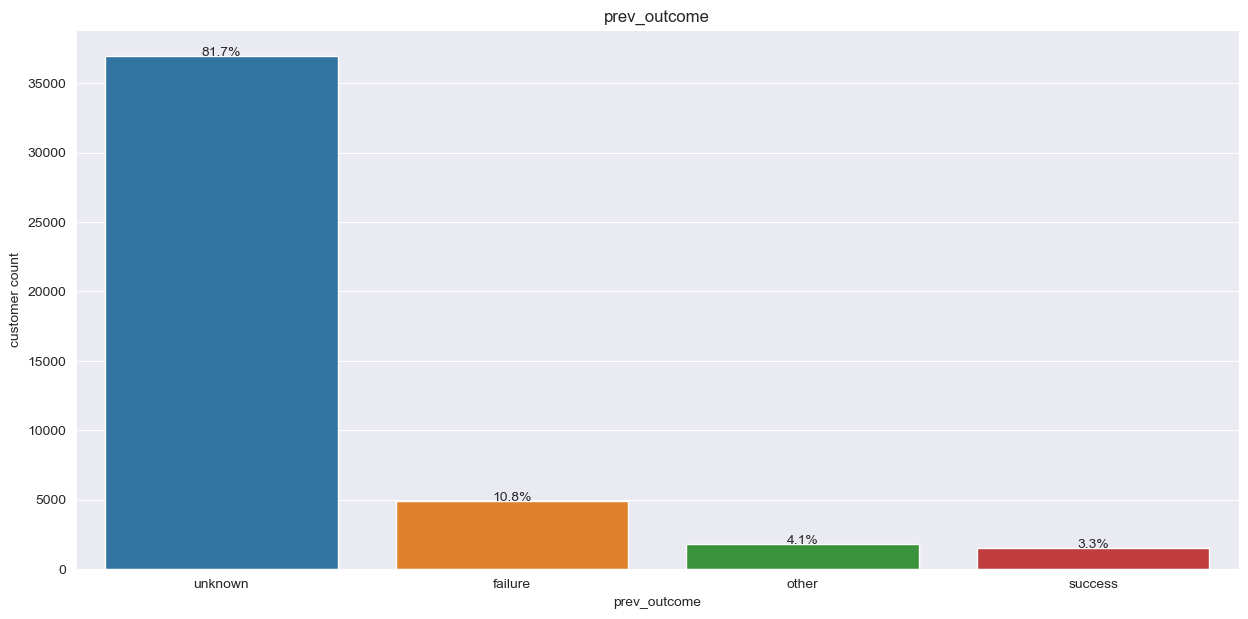

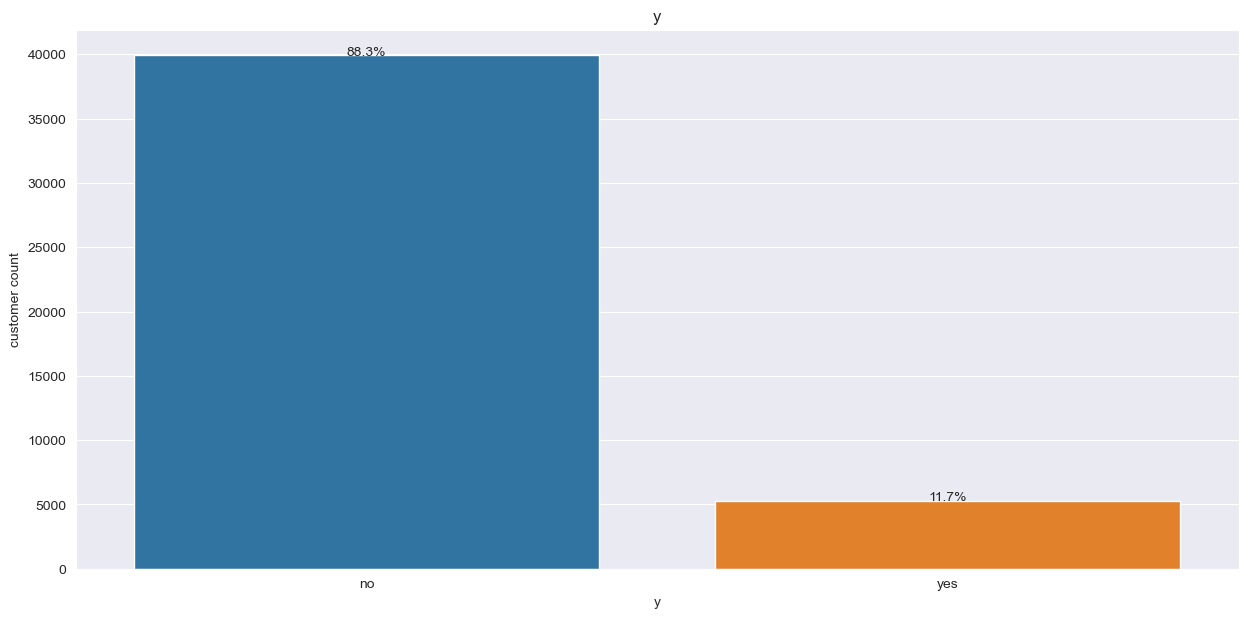

In [12]:
categorical_column = data.select_dtypes(include ="object").columns
print(categorical_column)

for i in categorical_column:
    plt.figure(figsize=(15,7))
    ax=sns.countplot(data=data,x=i)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel("customer count")
    
    total = len(data[i])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 0.1,
                f'{height/total:.1%}',
                ha="center")

1)By this visualization we can see top 3 professions in dataset are blue collar,management and technician
2)most of them are married
3)most of them are belongs to secondary education qualification
4)most of them use cellphone
5)most of them contacted in may month
6)major previous outcome are unknown
7)target variable is highly imbalanced

### Bivariate Analysis on categorical column

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome',
       'y'],
      dtype='object')


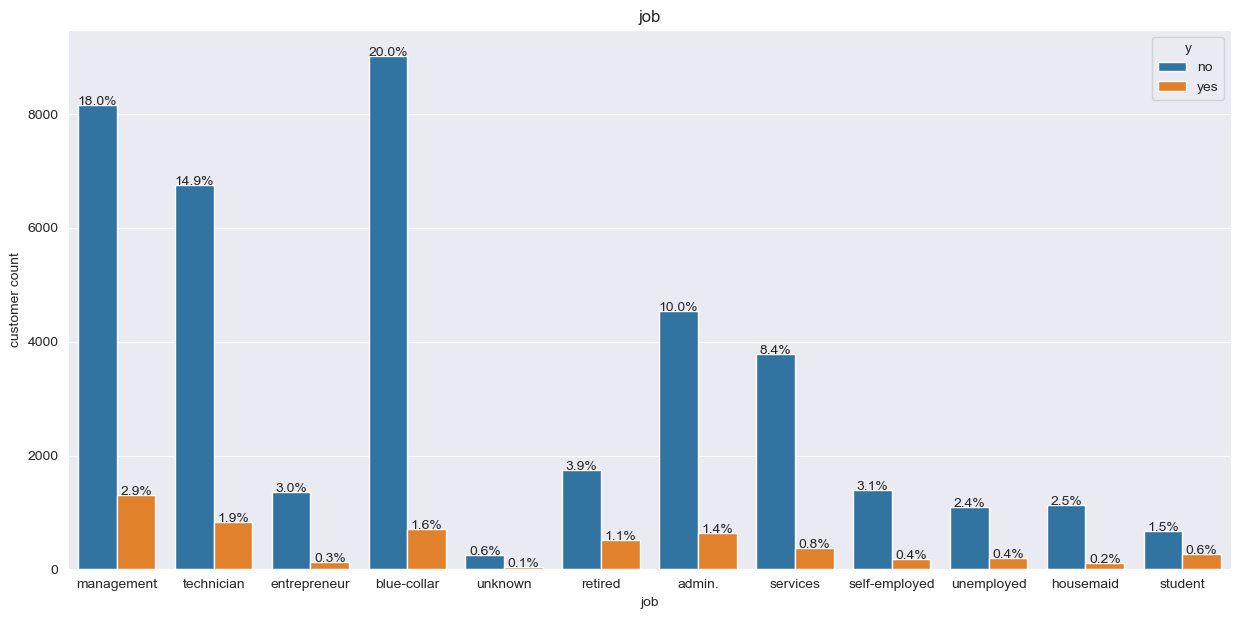

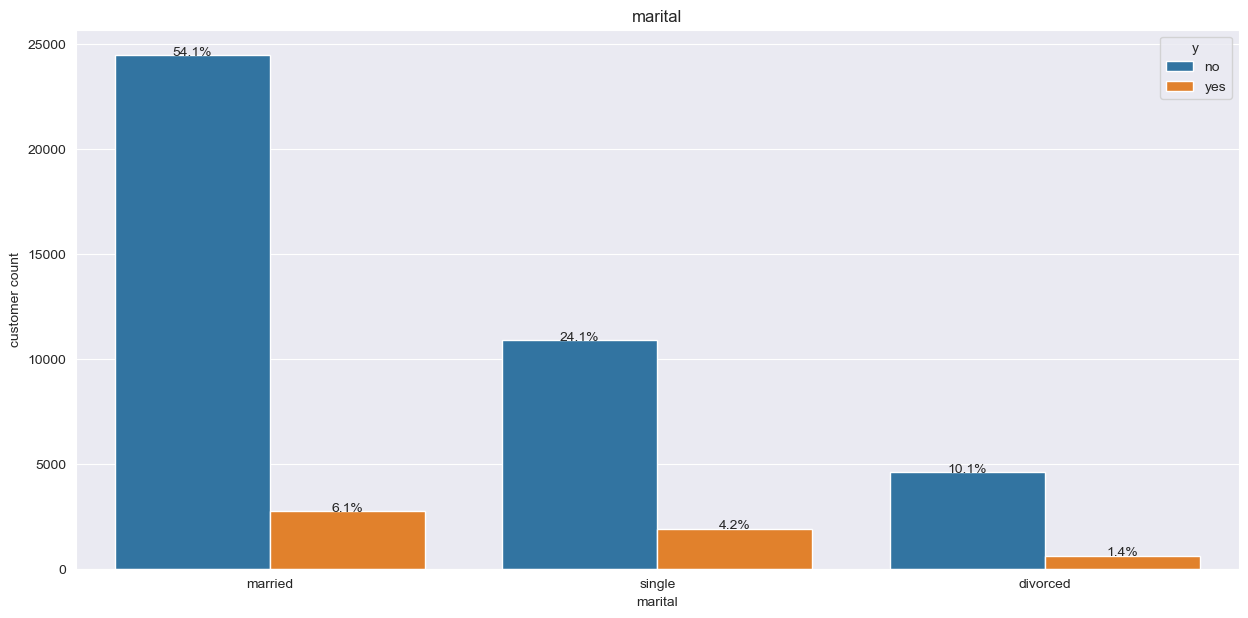

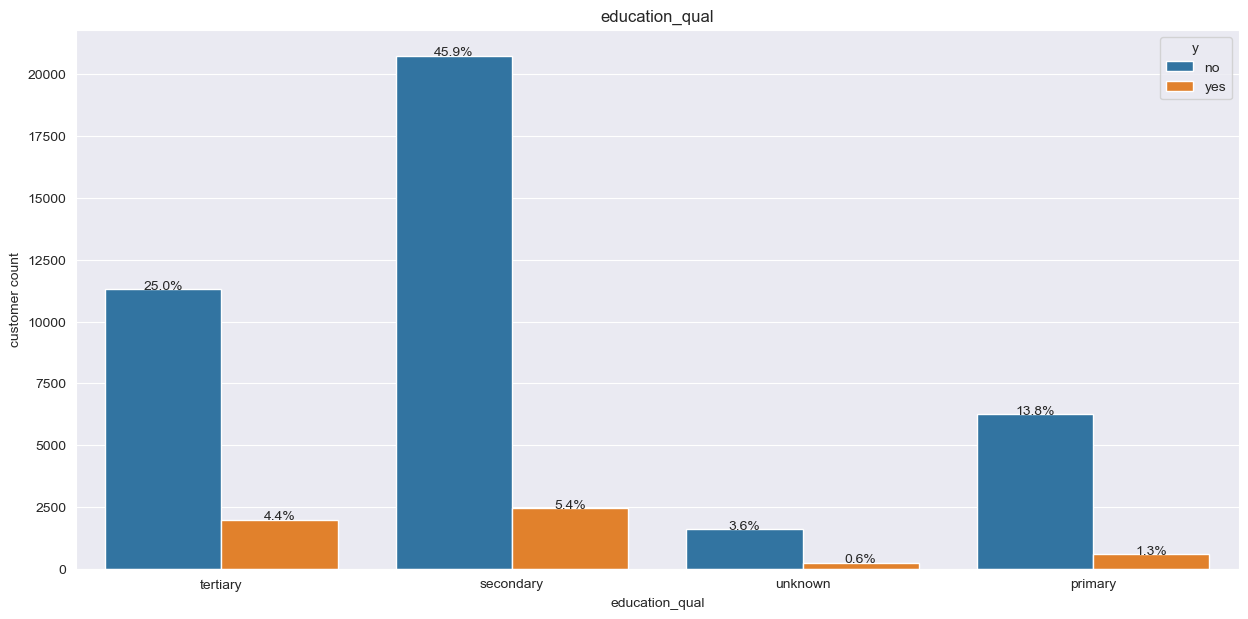

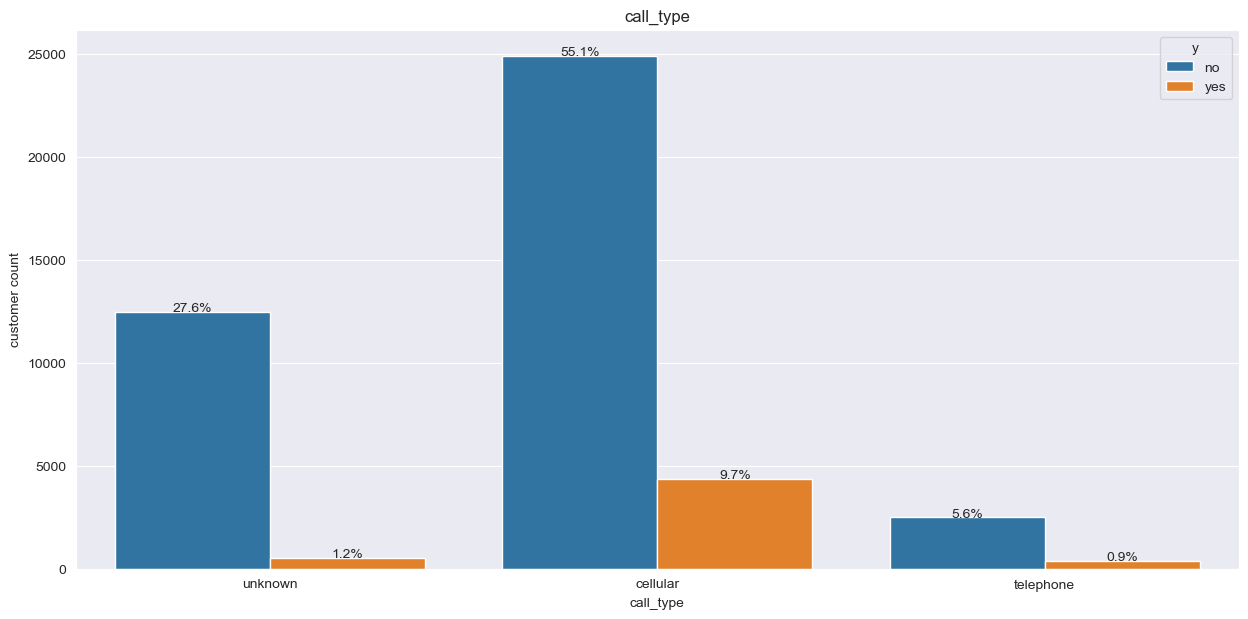

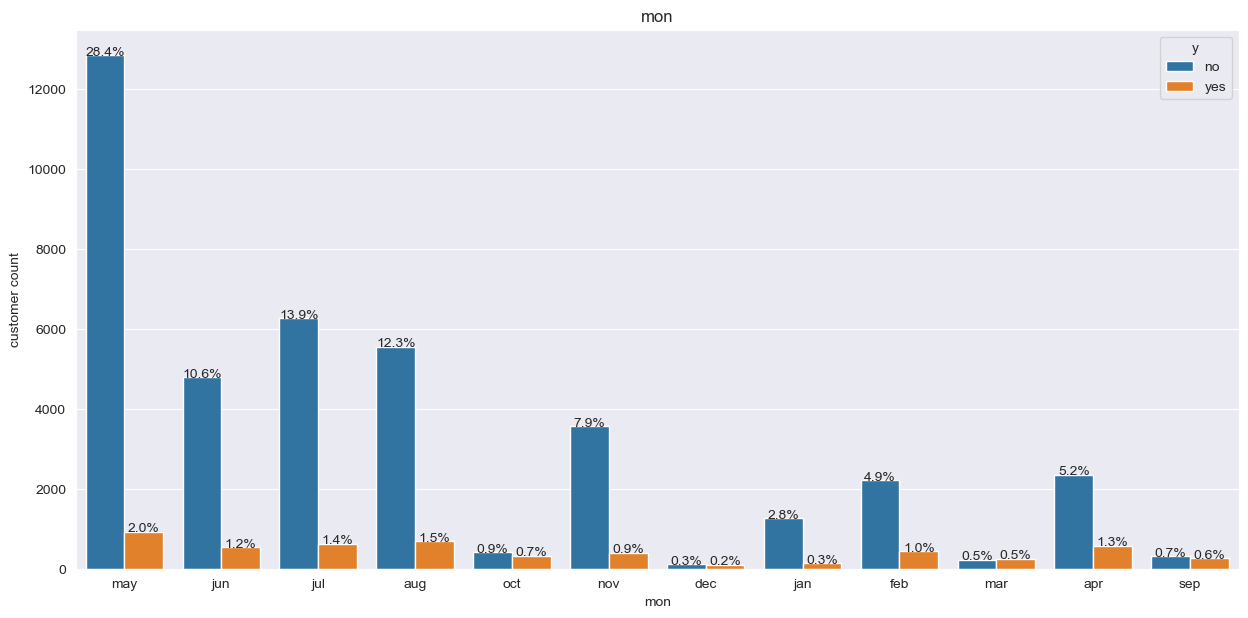

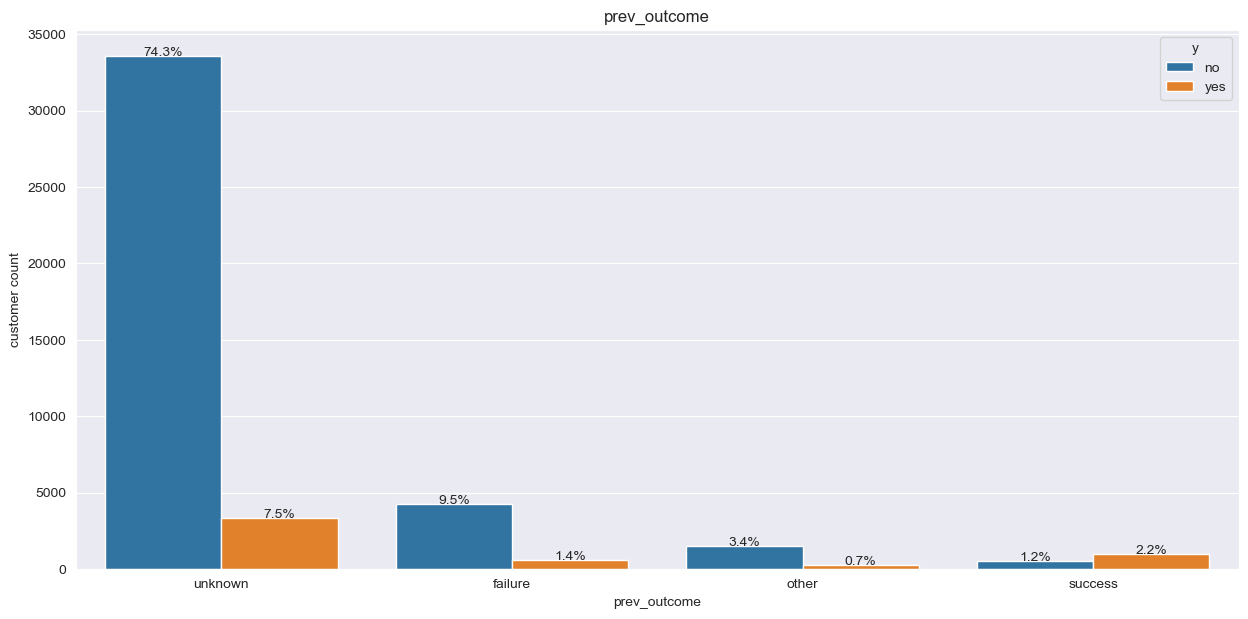

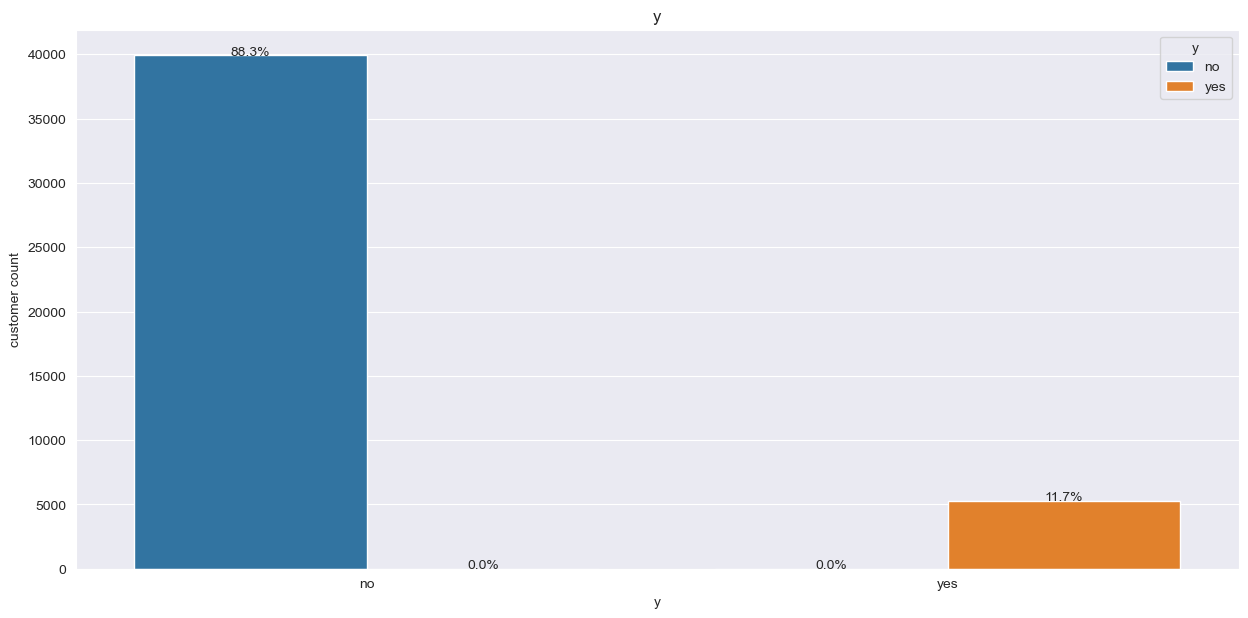

In [13]:
categorical_column = data.select_dtypes(include ="object").columns
print(categorical_column)

for i in categorical_column:
    plt.figure(figsize=(15,7))
    ax=sns.countplot(data=data,x=i,hue='y')
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel("customer count")
    
    total = len(data[i])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 0.1,
                f'{height/total:.1%}',
                ha="center")

By this visualization we can understand most of the management professionals are converted 
2) mostly married people are converted 
3) most converted people education qualification is secondary
4) mostly cellphone using people are converted
5) most preferred month to contact is may
6) most the converted people previous outcome are unknown

### Univariate analysis on numerical columns

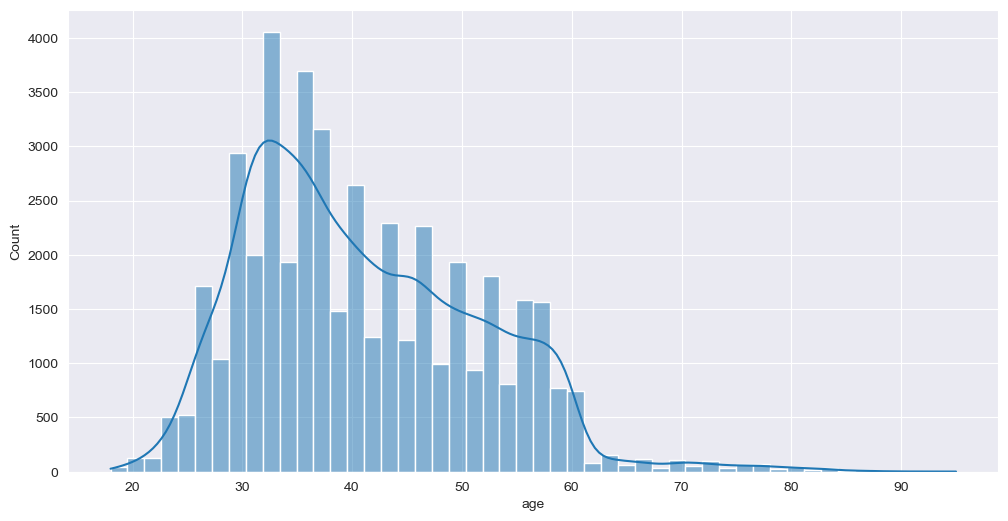

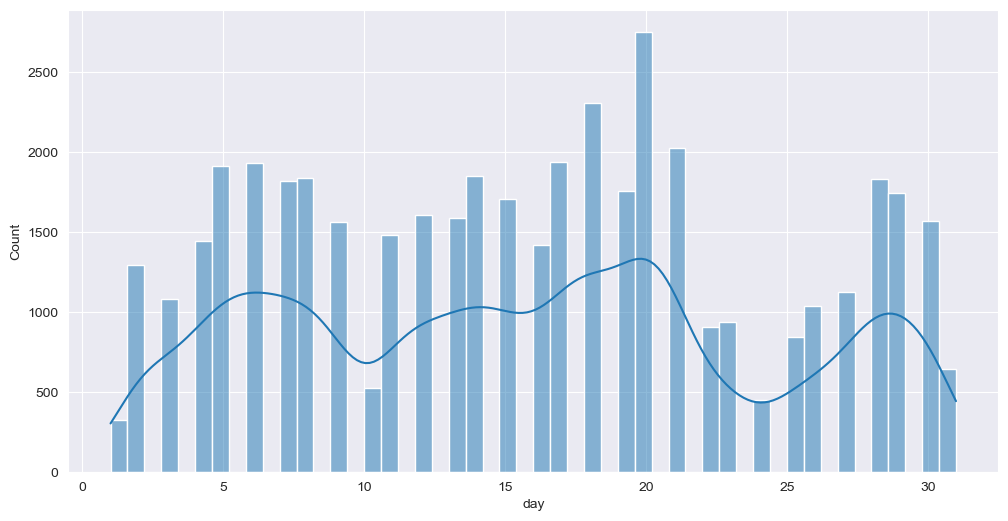

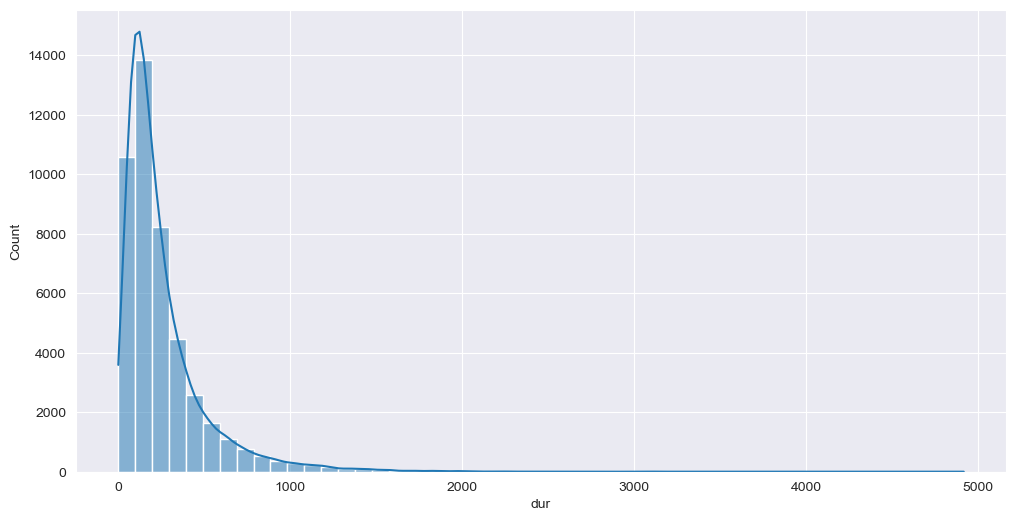

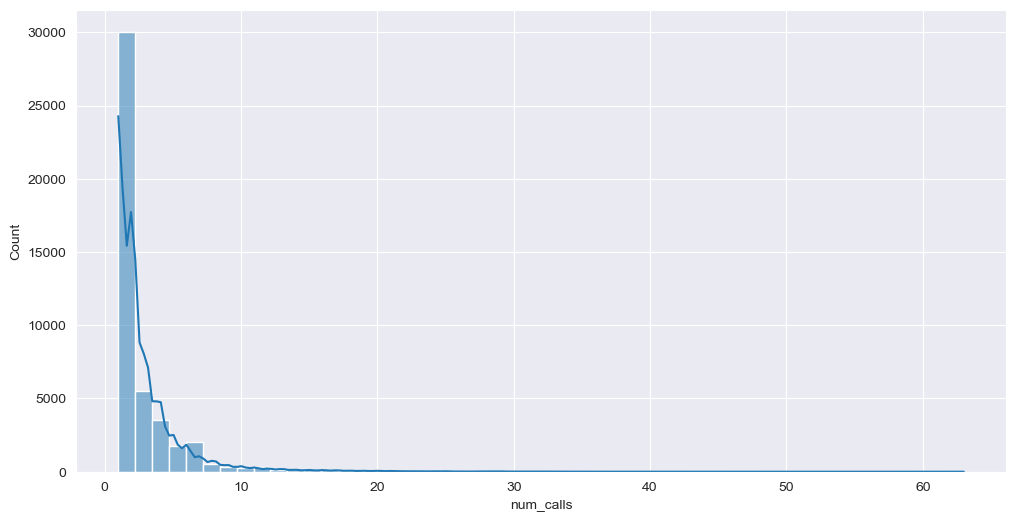

In [14]:
numerical_columns = data.select_dtypes(include="integer").columns

for i in numerical_columns:
    plt.figure(figsize=(12,6))
    sns.histplot(data=data,x=i,kde=True,bins=50)

### Outlier Analysis

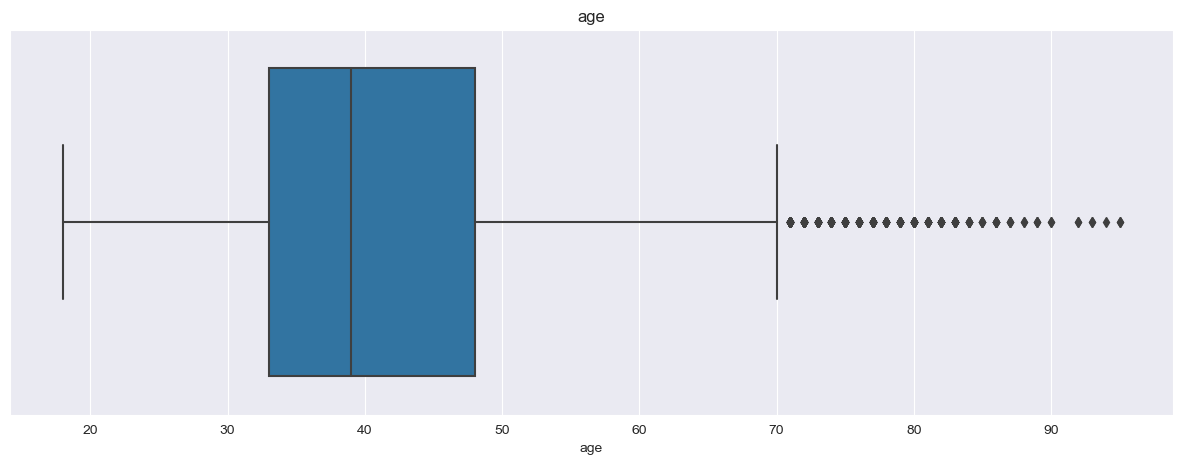

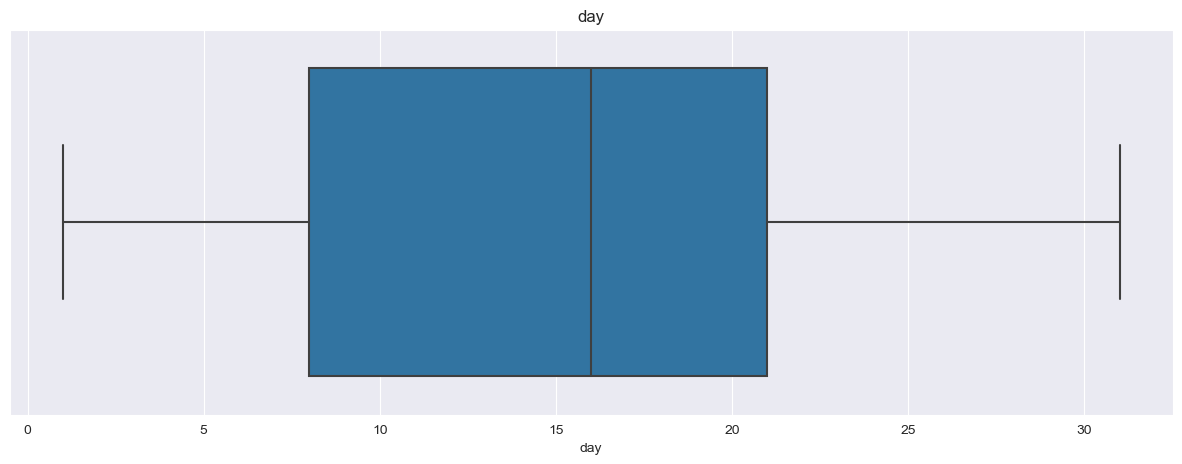

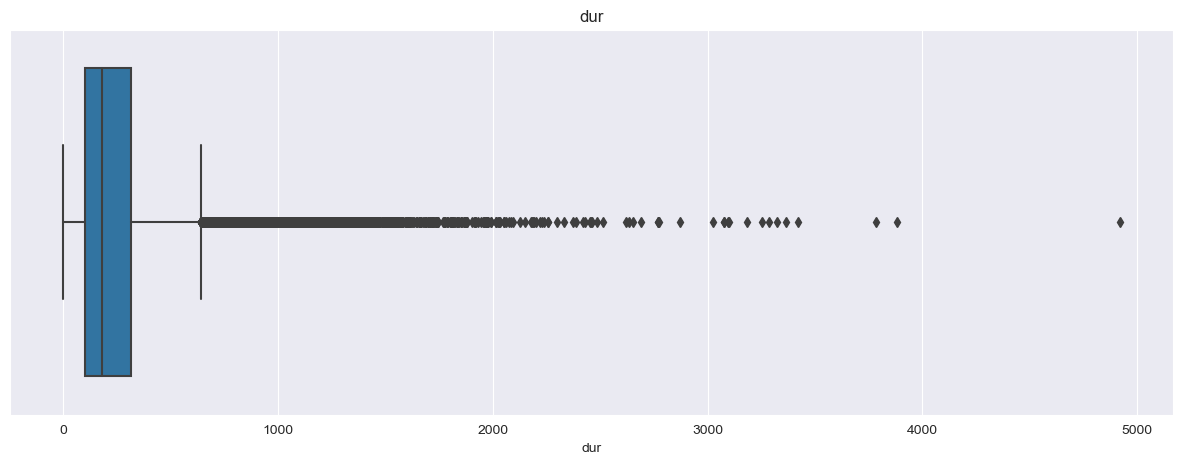

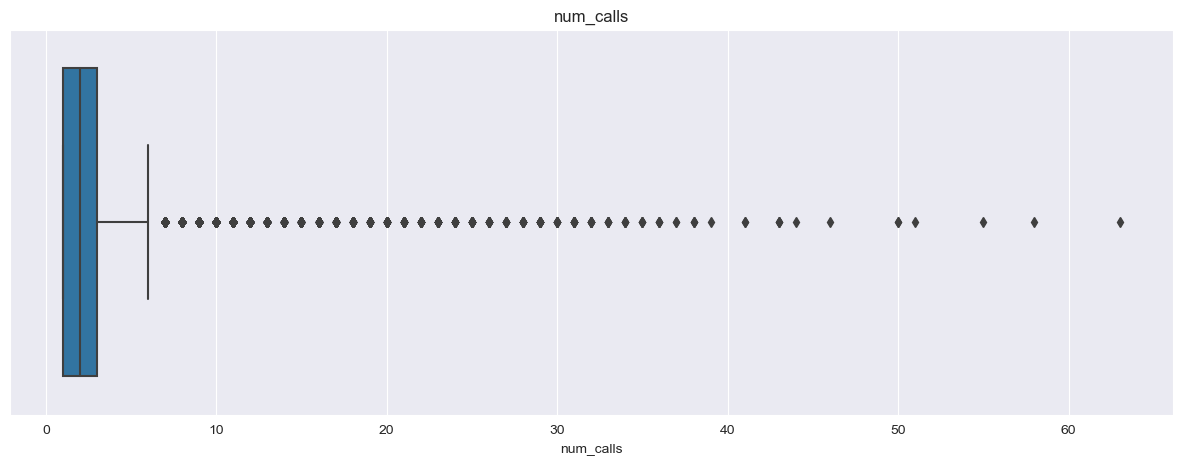

In [15]:
for i in numerical_columns:
    plt.figure(figsize=(15,5))
    sns.boxplot(data=data,x=i)
    plt.title(i)

By visualizing we can understand there is upper bound outlier in age, duration, num_calls

### IQR Outlier Analysis

In [16]:
upper=[]
lower=[]
for i in numerical_columns:
    iqr=data[i].quantile(0.75) - data[i].quantile(0.25)
    upper_limit = data[i].quantile(0.75)+ (1.5*iqr)
    lower_limit = data[i].quantile(0.25)- (1.5*iqr)
    print(i, ":", lower_limit, ",", upper_limit)
    upper.append(upper_limit)
    lower.append(lower_limit)

age : 10.5 , 70.5
day : -11.5 , 40.5
dur : -221.0 , 643.0
num_calls : -2.0 , 6.0


### capping the upper bound outlier

In [17]:
j=0
for i in numerical_columns:
    data.loc[data[i] > upper[j],i] = int(upper[j])
    j=j+1

### checking outiler

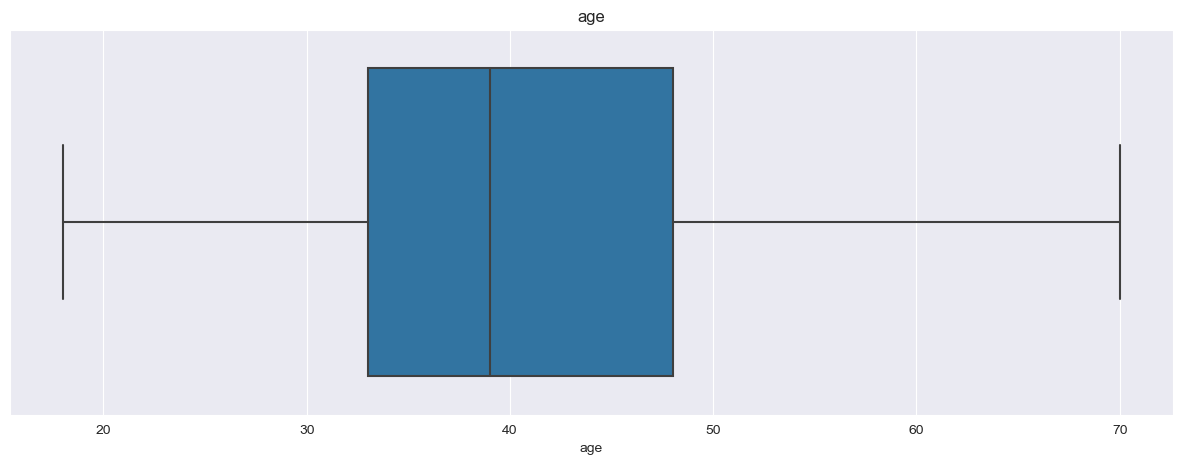

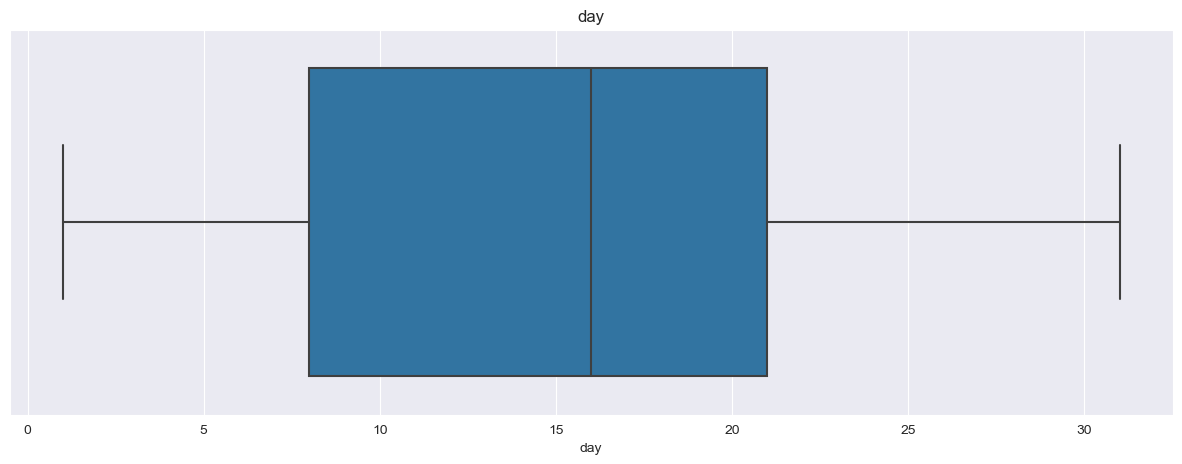

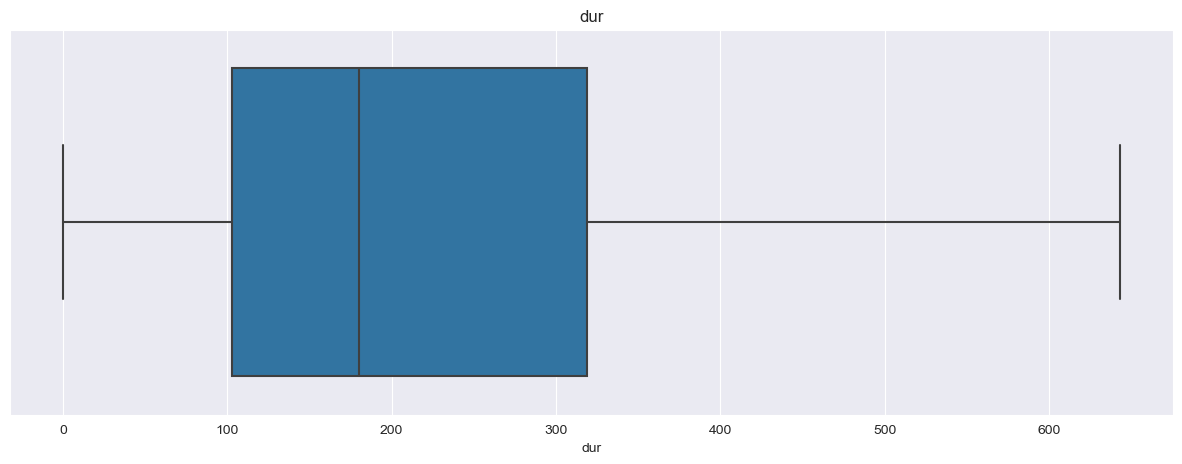

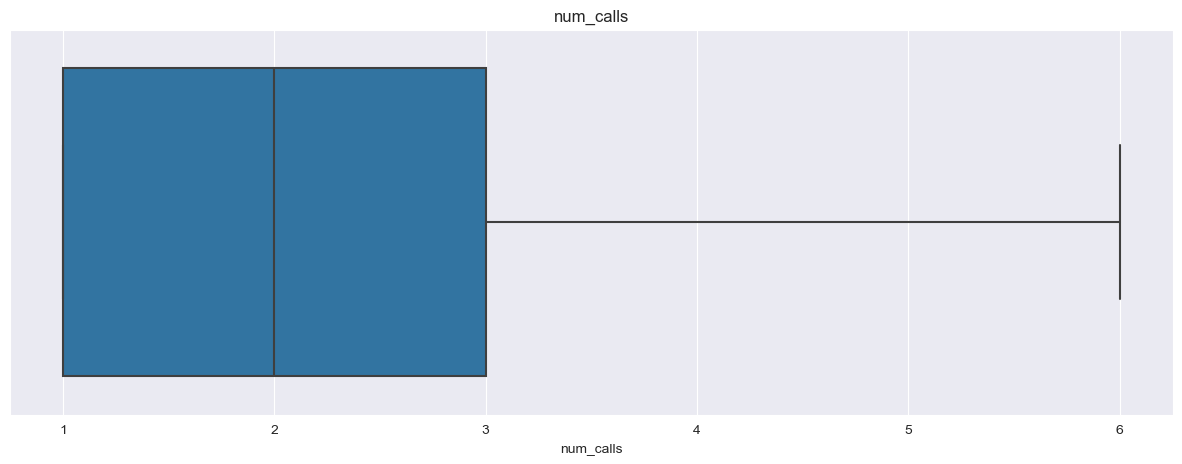

In [18]:
for i in numerical_columns:
    plt.figure(figsize=(15,5))
    sns.boxplot(data=data,x=i)
    plt.title(i)

now outliers are imputed

### Encoding required columns

In [19]:
for i in categorical_column:
    print(i,":",data[i].unique())

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital : ['married' 'single' 'divorced']
education_qual : ['tertiary' 'secondary' 'unknown' 'primary']
call_type : ['unknown' 'cellular' 'telephone']
mon : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
prev_outcome : ['unknown' 'failure' 'other' 'success']
y : ['no' 'yes']


### one hot encoding for nominal column

In [20]:
def onehot_encode(data,column):
    for i in column:
        dummies = pd.get_dummies(data[i],prefix=i)
        data = pd.concat([data,dummies], axis=1)
        data.drop([i], axis=1, inplace= True)
    return data

In [29]:
column=['job','marital','call_type','mon','prev_outcome','education_qual']
data=onehot_encode(data,column)

In [30]:
data.head()

,age,day,dur,num_calls,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown,education_qual_primary,education_qual_secondary,education_qual_tertiary,education_qual_unknown
0,58,5,261,1,no,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,44,5,151,1,no,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,33,5,76,1,no,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,47,5,92,1,no,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,33,5,198,1,no,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [31]:
data.replace({'y':{'yes':1,'no':0}},inplace=True)

In [32]:
data.head()

,age,day,dur,num_calls,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown,education_qual_primary,education_qual_secondary,education_qual_tertiary,education_qual_unknown
0,58,5,261,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,44,5,151,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,33,5,76,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,47,5,92,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,33,5,198,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


### correlation analysis of all column

<Axes: >

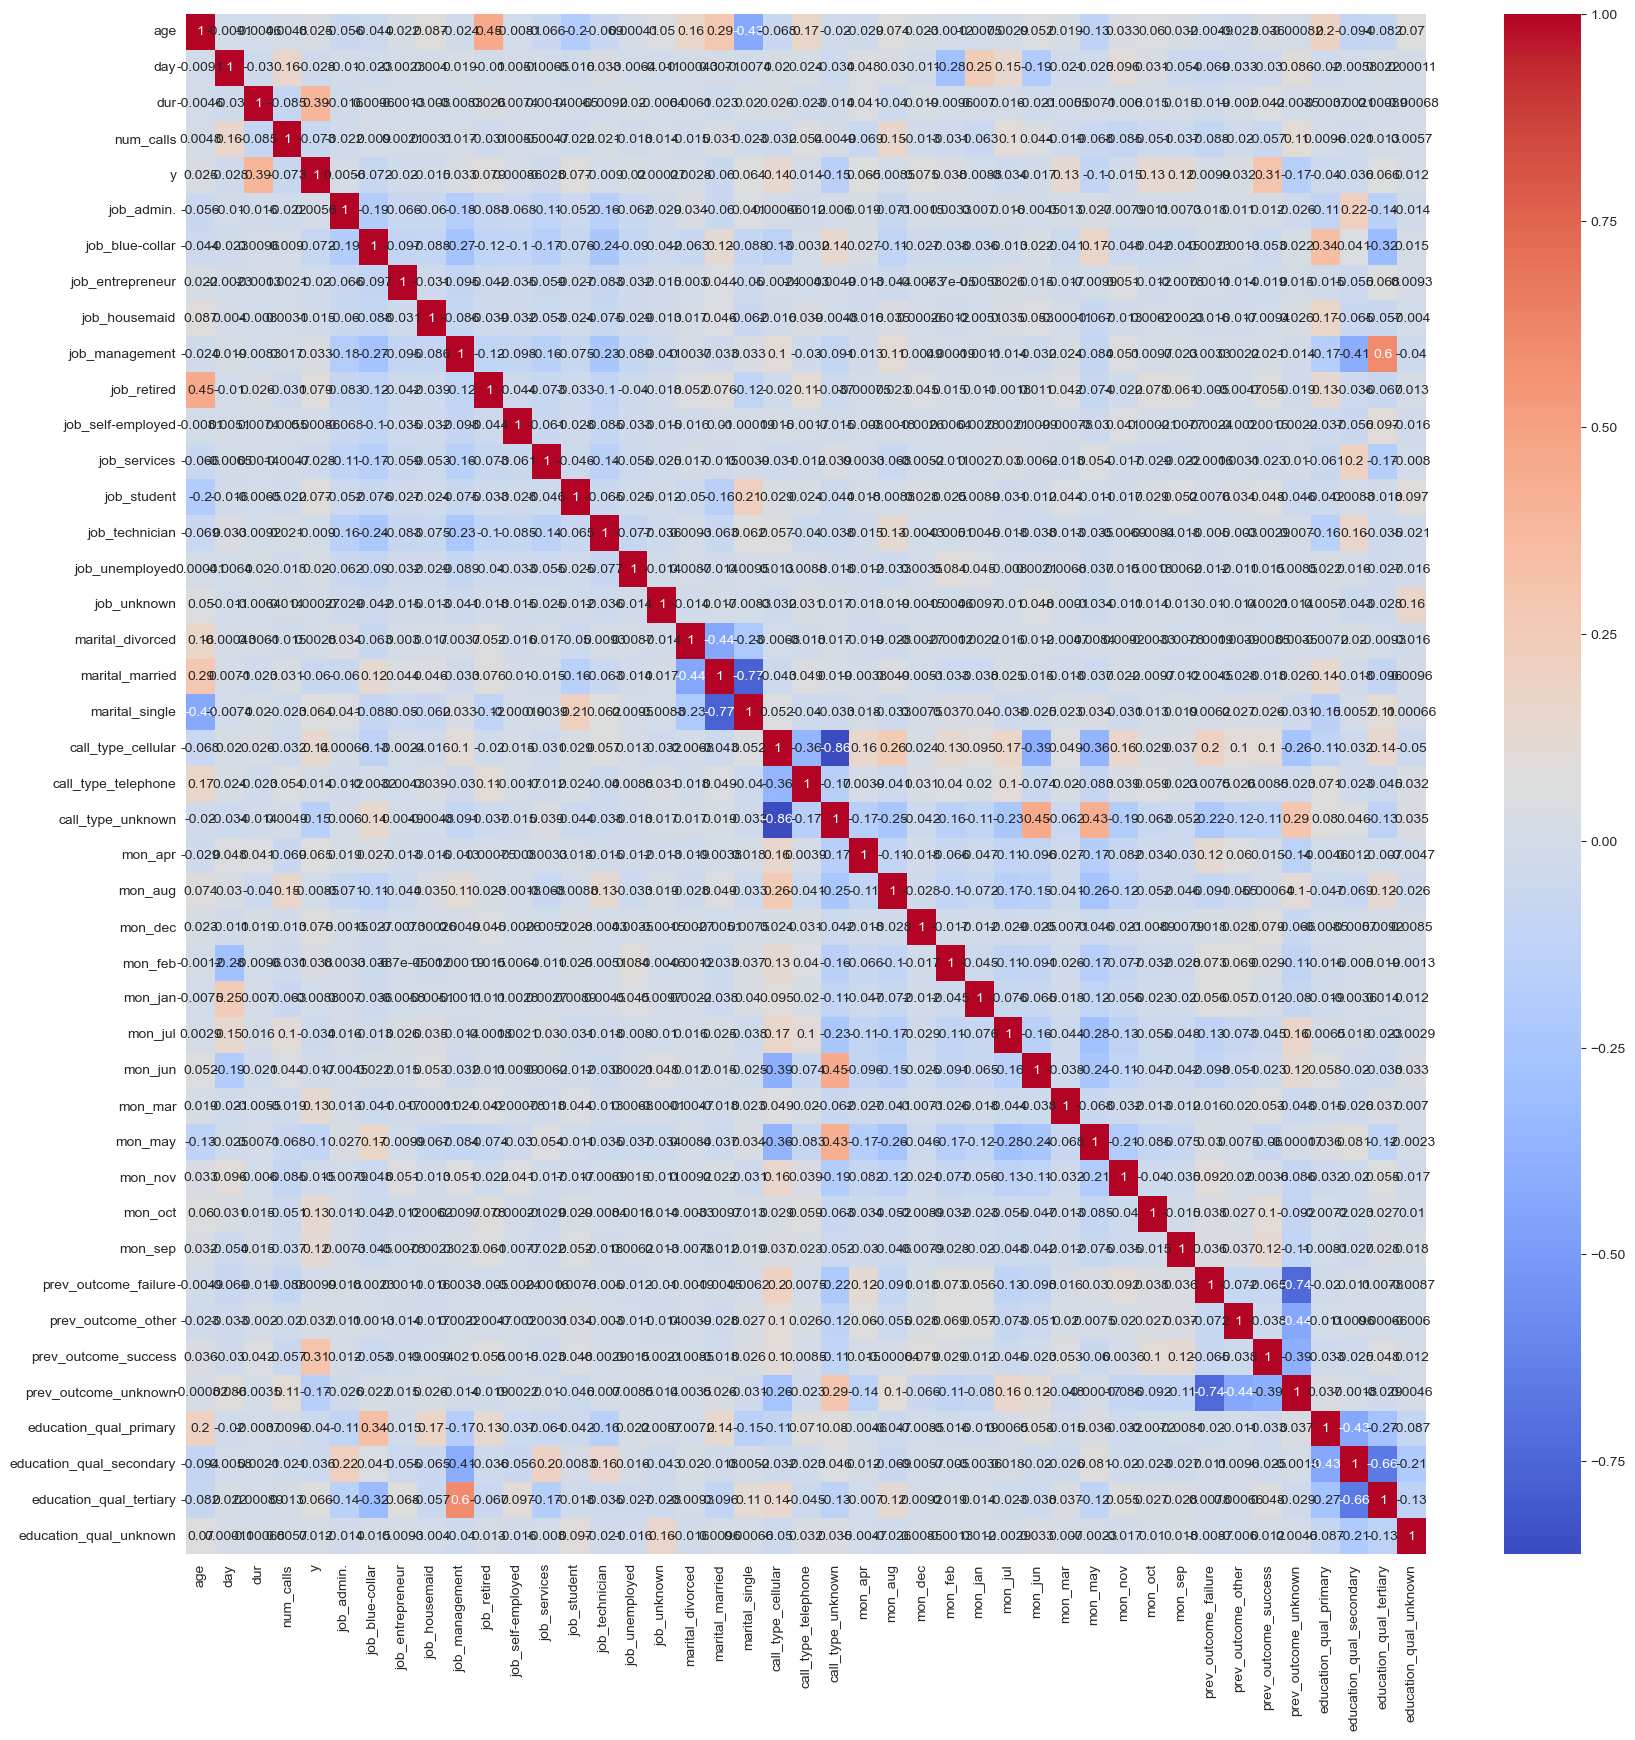

In [33]:
corr=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap="coolwarm",annot=True)

no columns are highly correlated so we dont need to remove any column

### balancing target variable

In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="auto",random_state=40)

### splitting feature and target variable

In [35]:
X=data.drop(['y'],axis=1)
y=data['y']

#### train test split

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=42)

#### fitting the training data for oversampling

In [38]:
X_feature,y_target=smote.fit_resample(X_train,y_train)
y_target.value_counts()

0    27956
1    27956
Name: y, dtype: int64

now target is oversampled and balanced, only for training data we should balance 

### scaling training data

In [40]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [41]:
X_train_scaled=scalar.fit_transform(X_feature)
X_test_scaled=scalar.transform(X_test)

In [44]:
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### defining model for prediction

In [43]:
def model_pred(model):
    y_pred=model.predict(X_test_scaled)
    y_pred_proba=model.predict_proba(X_test_scaled)[:, 1]
    print(classification_report(y_test,y_pred))
    print("auc-roc score :",roc_auc_score(y_test,y_pred_proba))

### logistic regression

In [46]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_target)
model_pred(log_model)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.64      0.35      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564

auc-roc score : 0.9016994751713083


### random forest

In [47]:
model_rf = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)
model_rf.fit(X_train_scaled, y_target)
model_pred(model_rf)

C:\Users\Ganesh Kumar\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11966
           1       0.60      0.40      0.48      1598

    accuracy                           0.90     13564
   macro avg       0.76      0.68      0.71     13564
weighted avg       0.88      0.90      0.89     13564

auc-roc score : 0.88942293109576


In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
model_gb = GradientBoostingClassifier(learning_rate=0.12,n_estimators=150)
model_gb.fit(X_train_scaled, y_target)
model_pred(model_gb)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     11966
           1       0.62      0.56      0.59      1598

    accuracy                           0.91     13564
   macro avg       0.78      0.76      0.77     13564
weighted avg       0.90      0.91      0.91     13564

auc-roc score : 0.9253371620090882


### pickiling model

In [51]:
import pickle
pickle.dump(model_gb, open('model_gb.pkl', 'wb'))

#### loading pickeled data

In [52]:
pickled_gb = pickle.load(open('model_gb.pkl', 'rb'))

### Feature importance

In [58]:
feat_imp = pd.DataFrame(data=model_gb.feature_importances_,index=X.columns,columns=["Feature_Importance"])
feat_imp=feat_imp.sort_values(by="Feature_Importance",ascending=False)

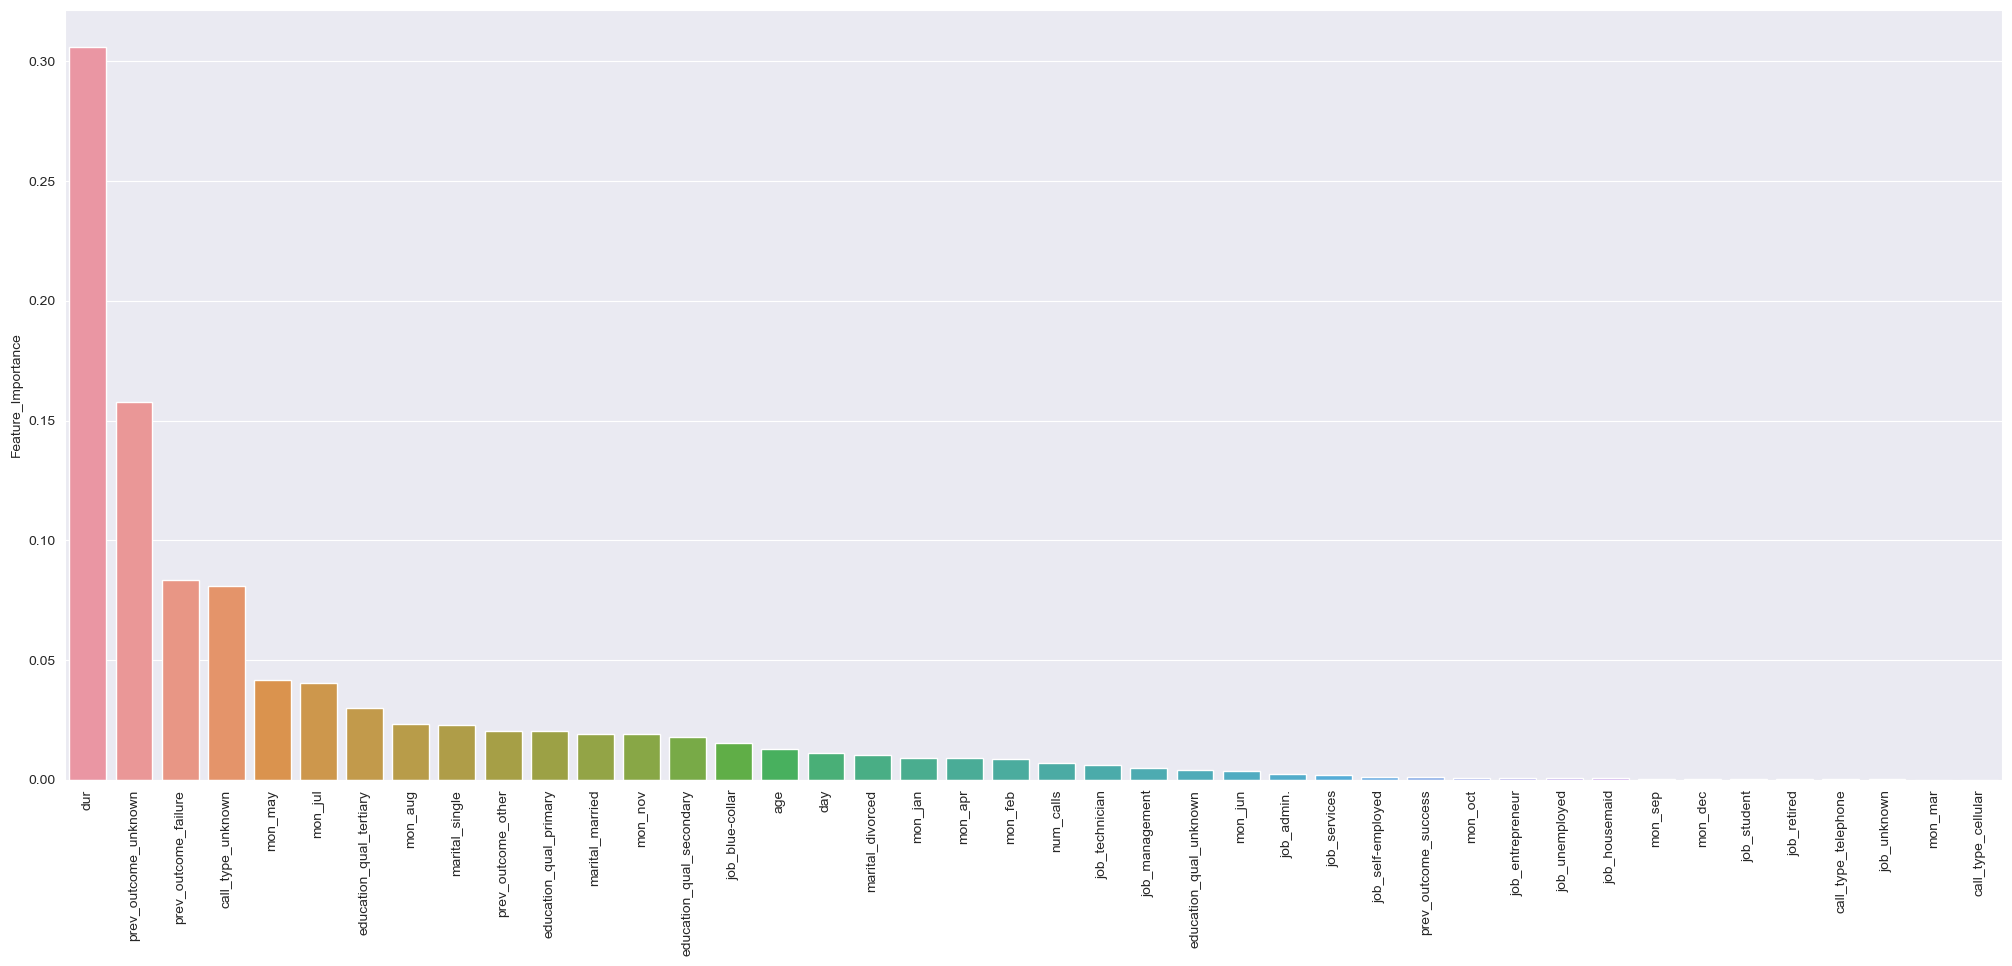

In [66]:
plt.figure(figsize=(25,10))
sns.barplot(data=feat_imp,x=feat_imp.index,y="Feature_Importance")
plt.xticks(rotation=90)
plt.show()

By this we can conclude this gradient boost algorithm performed well with auc-roc score 0.92